In [10]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load Data
df = pd.read_csv('loan_default_prediction.csv')
df.head()

,age,income,credit_score,dependents,home_owner,loan_default
0,64,100000.00,583,3,0,0
1,45,16803.24,685,4,0,0
2,69,15418.51,498,2,0,0
3,63,11474.46,533,4,0,0
4,46,11536.00,454,0,1,0


In [11]:
# Preprocessing : Handling missing values and encoding categories 
df = df.dropna()
X = df.drop('loan_default', axis=1)
y = df['loan_default']

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       161
           1       0.81      0.64      0.71        39

    accuracy                           0.90       200
   macro avg       0.86      0.80      0.83       200
weighted avg       0.90      0.90      0.90       200



Text(0.5, 1.0, 'Feature Importance')

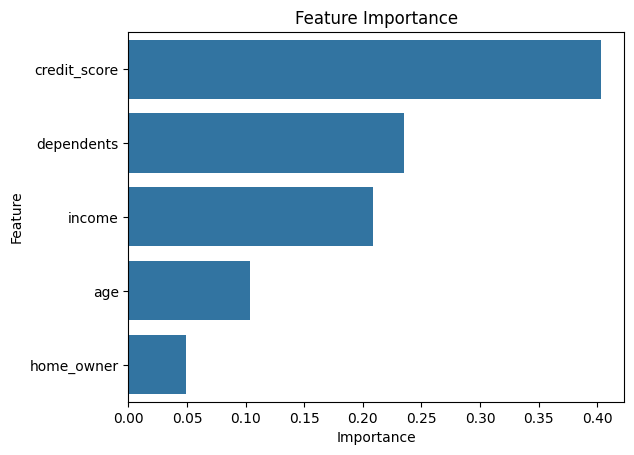

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


# Feature Importance  Visualization
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')

In [13]:
# 5. Save the model for deployment
joblib.dump(model, 'loan_model.pkl')

['loan_model.pkl']